In this Notebook, we will look at a Banking Case Study. The objective of the case study is to predict the Loan Rate Category for each Loan Applicant - also known as the Risk Based Pricing for the Lenders. The Datset was sourced from Analytics Vidhya Janta Hack series - ML for Banking Hackathon. 


In [ ]:
import pandas as pd
import pandas.util.testing as tm
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("loan_risk_category_data.csv")

Let's look at the sample of the data below to get an understanding of the features 

In [ ]:
df.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [ ]:
df.shape

(164309, 14)

The Dataset contains information on 164309 Applicants and their Loan Rate Categories. There are 12 independent features that will be used as an input to the model and the features that drives the model outcome will be found out as well.


Let's look at the distribution of the dependent variable 


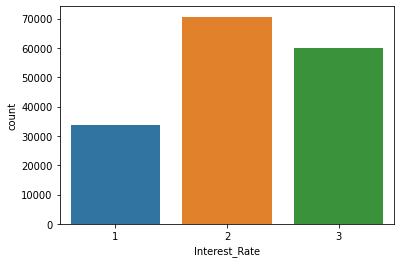

In [ ]:
import seaborn as sns
sns.countplot(df['Interest_Rate'])

Now, we have to check for Data Inconsistencies and correct them


1) Loan Amount Requested field should be of Integer Datatype and since it contains "," it is treated as an object datatype.

2)Length_Employed field should be of Integer Datatype , as it contains the word "year", it is treated as an object datatype.

3) Income_Verified field has redundancies with respect to its subcategory. The same sub-category is worded differently. Hence, it requires a correction.





In [ ]:
#correcting the Loan Requested fied
df['Loan_Amount_Requested'] = df['Loan_Amount_Requested'].str.replace(",","")

In [ ]:
df['Loan_Amount_Requested'] = df['Loan_Amount_Requested'].astype(int)

In [ ]:
#correcting the Length Employed field
df['Length_Employed'] = df['Length_Employed'].str.replace("years","")
df['Length_Employed'] = df['Length_Employed'].str.replace("year","")
df['Length_Employed'] = df['Length_Employed'].str.replace("<","")


In [ ]:
#correcting the Income Verified column
df['Income_Verified'].value_counts()

VERIFIED - income           59421
VERIFIED - income source    53015
not verified                51873
Name: Income_Verified, dtype: int64

In [ ]:
df['Income_Verified'].unique()

array(['not verified', 'VERIFIED - income', 'VERIFIED - income source'],
      dtype=object)

In [ ]:
df['Income_Verified'] = df['Income_Verified'].str.replace("VERIFIED - income source","verified")
df['Income_Verified'] = df['Income_Verified'].str.replace("VERIFIED - income","verified")
df['Income_Verified'].unique()

array(['not verified', 'verified'], dtype=object)

Let's answer some Business Questions now :

1) What is the Average Loan Amount disbursed across the Interest Rate Categories?

2) What is the Interest Category proportion across the different purpose of Loan?

3) What is the Average Income of Applicants across Genders?

4) Among the Loan Categories, which ones did the Applicants most opt for?

5) What was average debt-to-income ratio across different Loan categories?

In [ ]:
#Average Loan Amount disbursed across the Interest Rate Categories
df.groupby(['Interest_Rate']).agg({'Loan_Amount_Requested':'mean'}).reset_index()

,Interest_Rate,Loan_Amount_Requested
0,1,13351.443531
1,2,13419.251913
2,3,16007.801679


Rate Category 3 had the highest average loan amount requested for, at 16000 dollars and the Rate Category 1 being the lowest at 13351 dollars


In [ ]:
#Interest Category proportion across the diffe_ent purpose of Loan
pd.crosstab(df['Purpose_Of_Loan'],df['Interest_Rate']).apply(lambda r: r/r.sum(), axis=1)

Interest_Rate,1,2,3
Purpose_Of_Loan,,,
car,0.350663,0.417507,0.231830
credit_card,0.287918,0.460528,0.251554
debt_consolidation,0.176404,0.435691,0.387905
educational,0.305785,0.644628,0.049587
home_improvement,0.235732,0.417305,0.346963
house,0.177232,0.311772,0.510996
major_purchase,0.307132,0.400873,0.291994
medical,0.144062,0.364698,0.491239
moving,0.124230,0.298768,0.577002


For an Applicant seeking a loan towards Education, 65% of applicants fell under the Interest Rate Category 2. For an Applicant seeking a Housing Loan, 50% of the applicants were under the Rate Category 3. 


In [ ]:
#Average Income of Applicants across Gender
df.groupby(['Gender']).agg({'Annual_Income':'mean'}).reset_index()

,Gender,Annual_Income
0,Female,73184.863845
1,Male,73390.122669


The Average Income of the Applicants were uniform and consistent across Gender at 73000 Dollars.

In [ ]:
#Count of Loan Category
df['Purpose_Of_Loan'].value_counts()

debt_consolidation    97101
credit_card           36684
home_improvement       9269
other                  8346
major_purchase         3435
small_business         2392
car                    1885
medical                1541
moving                  974
vacation                837
wedding                 828
house                   773
renewable_energy        123
educational             121
Name: Purpose_Of_Loan, dtype: int64

The Top 3 reasons that Applicants applied for a loan were towards the below :

1) Debt Consolidation

2) Credit Card Payment

3) Modification of their House

In [ ]:
#Average Debt-to-Income Ratio across different Loan Categories
df.groupby(['Purpose_Of_Loan']).agg({'Debt_To_Income':'mean'})

,Debt_To_Income
Purpose_Of_Loan,
car,13.516350
credit_card,17.515313
debt_consolidation,17.889914
educational,11.427686
home_improvement,14.376742
house,13.538111
major_purchase,13.689965
medical,16.024361
moving,15.378655


Applicants whose loans belong to the Debt Consolidation category had the highest Debt-to-Income Ratio of 17 and applicants who had applied for Education Loans had the lowest Debt-to-Income Ration of 11.


Now, let's look at missing value imputation 

In [ ]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

missing_value_df.sort_values(by='percent_missing', ascending=False, inplace=True)


In [ ]:
missing_value_df

,column_name,percent_missing
Months_Since_Deliquency,Months_Since_Deliquency,53.788289
Home_Owner,Home_Owner,15.427639
Annual_Income,Annual_Income,15.277313
Length_Employed,Length_Employed,4.486060
Loan_ID,Loan_ID,0.000000
Loan_Amount_Requested,Loan_Amount_Requested,0.000000
Income_Verified,Income_Verified,0.000000
Purpose_Of_Loan,Purpose_Of_Loan,0.000000
Debt_To_Income,Debt_To_Income,0.000000
Inquiries_Last_6Mo,Inquiries_Last_6Mo,0.000000


We shall remove the "Months since Last Delinquency" field from the model as it contains more than 50% missing information. 

We shall impute the missing values of categorical variables with the corresponding frequently occuring sub-category and the continuous variable with its' mean value. 

In [ ]:
df['Home_Owner'].value_counts()

Mortgage    70345
Rent        56031
Own         12525
Other          49
None           10
Name: Home_Owner, dtype: int64

In [ ]:
df['Home_Owner'].fillna('Mortgage',inplace=True)

In [ ]:
df['Annual_Income'].fillna(df['Annual_Income'].mean(),inplace=True)

In [ ]:
df['Length_Employed'].unique()

array([' 1 ', '4 ', '7 ', '8 ', '2 ', '10+ ', '1 ', nan, '6 ', '9 ', '3 ',
       '5 '], dtype=object)

In [ ]:
df['Length_Employed'] = df['Length_Employed'].str.replace(" ","")
df['Length_Employed'] = df['Length_Employed'].str.replace("+","")


In [ ]:
df['Length_Employed'].fillna("5",inplace=True)

In [ ]:
df['Length_Employed'] = df['Length_Employed'].astype(int)

Let's create Dummy variables followed by Train-Test split of 75-25 for Modelling purpose


In [ ]:
df_dummies = pd.get_dummies(df)

In [ ]:
df_dummies.shape

(164309, 33)

In [ ]:
df_dummies.dtypes

Loan_ID                                 int64
Loan_Amount_Requested                   int64
Length_Employed                         int64
Annual_Income                         float64
Debt_To_Income                        float64
Inquiries_Last_6Mo                      int64
Months_Since_Deliquency               float64
Number_Open_Accounts                    int64
Total_Accounts                          int64
Interest_Rate                           int64
Home_Owner_Mortgage                     uint8
Home_Owner_None                         uint8
Home_Owner_Other                        uint8
Home_Owner_Own                          uint8
Home_Owner_Rent                         uint8
Income_Verified_not verified            uint8
Income_Verified_verified                uint8
Purpose_Of_Loan_car                     uint8
Purpose_Of_Loan_credit_card             uint8
Purpose_Of_Loan_debt_consolidation      uint8
Purpose_Of_Loan_educational             uint8
Purpose_Of_Loan_home_improvement  

In [ ]:
df_dummies['Interest_Rate'] = df_dummies['Interest_Rate'].astype(int)

In [ ]:
Y = df_dummies['Interest_Rate']
del df_dummies['Interest_Rate']
del df_dummies['Loan_ID']
del df_dummies['Months_Since_Deliquency']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_dummies, Y, test_size=0.25, random_state=1)

Now let's build a XGBoost Model with 100 Trees and understand what are the most significant features impacting the Loan Interest Rate Classification


In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(n_estimators=100)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = xgb.predict(x_test)

In [ ]:
y_pred

array([3, 2, 2, ..., 2, 2, 3])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
confusion

array([[  930,  6075,  1363],
       [  644, 12145,  4914],
       [  176,  6385,  8446]])

In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred))



Classification Report

              precision    recall  f1-score   support

           1       0.53      0.11      0.18      8368
           2       0.49      0.69      0.57     17703
           3       0.57      0.56      0.57     15007

    accuracy                           0.52     41078
   macro avg       0.53      0.45      0.44     41078
weighted avg       0.53      0.52      0.49     41078



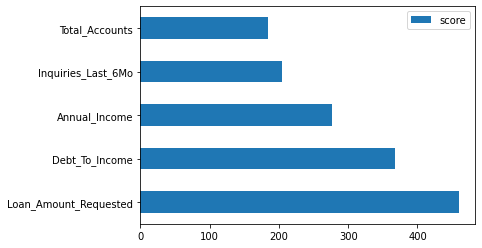

In [ ]:
feature_important = xgb.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.head().plot(kind='barh')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

Weighted Precision: 0.53
Weighted Recall: 0.52
Weighted F1-score: 0.49


Since the Accuracy of the model is low, let's look at how to improve the Accuracy. There is a imbalanced class problem. Hence, we will use SMOTE Technique to overcome this issue. 


In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel())

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

In [ ]:
xgb_res = XGBClassifier(n_estimators=100)
xgb_res.fit(x_train_res, y_train_res)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
x_test = np.array(x_test)

In [ ]:
y_pred_res = xgb_res.predict(x_test)

In [ ]:
print('\nClassification Report\n')
print(classification_report(y_test, y_pred_res))


Classification Report

              precision    recall  f1-score   support

           1       0.48      0.20      0.28      8368
           2       0.50      0.63      0.56     17703
           3       0.57      0.57      0.57     15007

    accuracy                           0.52     41078
   macro avg       0.52      0.47      0.47     41078
weighted avg       0.52      0.52      0.51     41078



In [ ]:
print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred_res, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred_res, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred_res, average='weighted')))

Weighted Precision: 0.52
Weighted Recall: 0.52
Weighted F1-score: 0.51


Conclusion :

In this notebook, we demonstrated how to build a XGBoost Predictive Model to classify a Loan's Interest Rate to help with the Bank's risk based pricing. The top 3 features that have an impact on the model are : Loan Amount Requested, Debt-to-Income Ratio and the Annual Income of the Applicant. The Model gave a weighted accuracy of 52% , with similar values of precision and recall. After performing SMOTE operation there was a minor increase in the F1 value, however the Accuracy remained the same. 
